# Overview

How happy are customers based on survey. 

Data Description:
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me
Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [29]:
# Imports
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read in data
df = pd.read_csv("HappinessSurvey2020.csv")
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


# EDA

Attributes X2 and X3 have the lowest rating on average.

In [11]:
# Profile Report
# profile = ProfileReport(df, minimal=True)
# profile.to_file(output_file="Happiness.html")

In [12]:
# Mean & 25%
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Wranggle Data

Data is clean; no missing values

In [3]:
# Train/Test Split
train, test = train_test_split(df, test_size=.2, train_size=.8,
                              random_state=42, stratify=df["Y"])
train.shape, test.shape

((100, 7), (26, 7))

This is a classification problem. The majority class occurs with 55% frequancy.

In [4]:
train["Y"].value_counts(normalize=True)

1    0.55
0    0.45
Name: Y, dtype: float64

In [5]:
# Feature Selection
target = "Y"
features = train.drop(columns=[target]).columns

In [6]:
X_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Linear Model

In [87]:
logreg = LogisticRegressionCV(cv=3)
logreg.fit(X_train,y_train)

LogisticRegressionCV(cv=3)

In [88]:
ypred = logreg.predict(x_test)
print("Train Accuracy:", logreg.score(X_train,y_train))
print("Test Accuracy:", logreg.score(x_test,y_test))

Train Accuracy: 0.58
Test Accuracy: 0.6153846153846154


Confusion Matrix : predicted 8 unhappy customers were happy and also identified 2 happy customers as unhappy

In [89]:
cm = metrics.confusion_matrix(y_test,ypred,labels=[1,0])
print(cm)

[[12  2]
 [ 8  4]]


In [90]:
# Coefficients
coefficients = pd.Series(logreg.coef_[0],features)
coefficients

X1    0.408914
X2   -0.148175
X3    0.086456
X4   -0.011165
X5    0.228168
X6   -0.024938
dtype: float64

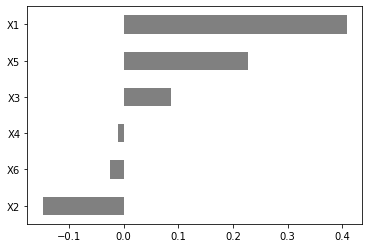

In [91]:
coefficients.sort_values().plot.barh(color="grey");

# Tree Model

In [92]:
clf = RandomForestClassifier(n_estimators=10,
                            min_samples_leaf=3)
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=10)

In [93]:
ypred = clf.predict(x_test)
print("Train Accuracy:", clf.score(X_train,y_train))
print("Test Accuracy:", clf.score(x_test,y_test))

Train Accuracy: 0.78
Test Accuracy: 0.6923076923076923


In [94]:
cm = metrics.confusion_matrix(y_test,ypred,labels=[1,0])
print(cm)

[[12  2]
 [ 6  6]]


In [95]:
# Feature Importances
feature_importances = pd.Series(clf.feature_importances_,features)
feature_importances

X1    0.208712
X2    0.137661
X3    0.176966
X4    0.116401
X5    0.203325
X6    0.156934
dtype: float64

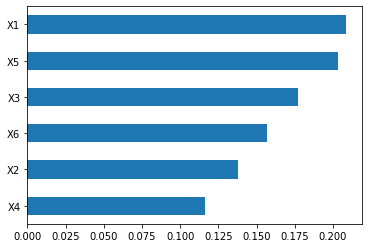

In [96]:
feature_importances.sort_values().plot.barh();